In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10 

In [ ]:
cifar10_names = {
    0: 'plane',
    1: 'car',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog frog horse boat truck
}

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
type(X_train)

numpy.ndarray

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

[6]
[9]
[9]


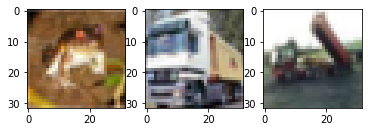

In [11]:
# plot 1st few images
j = 3
fig, ax = plt.subplots(1, j)
for i in range(j):
  ax[i].imshow(X_train[i])
  ax[i].set_     
  (y_train[i])